In [5]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#con.close()

In [8]:
df = pd.read_csv("./BFF_SII_RAW_DATA.csv")
df = df.convert_objects(convert_numeric=True)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [9]:
df = df.drop("Unnamed: 0",axis=1)

In [10]:
#

In [11]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print row
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [12]:
df=df[df['status']==4]
df = df.apply(takestring,axis=1)
df = df.convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [13]:
df.head()

,BF-F1+,BF-F10+,BF-F100+,BF-F101+,BF-F102+,BF-F103+,BF-F104+,BF-F105+,BF-F11+,BF-F12+,BF-F13+,BF-F14+,BF-F15+,BF-F16+,BF-F17+,BF-F18+,BF-F19-,BF-F2+,BF-F20+,BF-F21+,BF-F22+,BF-F23+,BF-F24+,BF-F25+,BF-F26+,BF-F27+,BF-F28+,BF-F29+,BF-F3+,BF-F30+,BF-F31+,BF-F32+,BF-F33+,BF-F34-,BF-F35+,BF-F36+,BF-F37+,BF-F38+,BF-F39+,BF-F4+,BF-F40+,BF-F41+,BF-F42-,BF-F43+,BF-F44-,BF-F45+,BF-F46-,BF-F47-,BF-F48-,BF-F49-,BF-F5+,BF-F50+,BF-F51+,BF-F52+,BF-F53+,BF-F54+,BF-F55-,BF-F56-,BF-F57-,BF-F58-,BF-F59-,BF-F6-,BF-F60-,BF-F61+,BF-F63-,BF-F64+,BF-F65+,BF-F66-,BF-F67+,BF-F68-,BF-F69-,BF-F7+,BF-F70+,BF-F71+,BF-F72-,BF-F73+,BF-F74+,BF-F75+,BF-F76+,BF-F77+,BF-F78+,BF-F79+,BF-F8+,BF-F80+,BF-F81+,BF-F82+,BF-F83+,BF-F84+,BF-F85+,BF-F86+,BF-F87+,BF-F88+,BF-F89+,BF-F9+,BF-F90+,BF-F91+,BF-F92+,BF-F93+,BF-F94+,BF-F95-,BF-F96+,BF-F97+,BF-F98+,BF-F99+,Extra_27-,Extra_28+,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,assignmentid,beginexp,beginhit,bonus,browser,codeversion,cond,counterbalance,datastring,endhit,hitid,ipaddress,language,platform,status,uniqueid,workerid
0,0.61,0.56,99.00,50.00,50.00,90.81,99.50,0.33,99.28,89.70,99.94,90.03,99.72,90.31,10.69,1.84,9.91,1.34,30.57,0.78,0.84,10.69,1.17,50.00,0.22,10.30,50.00,0.67,9.80,10.13,98.39,10.02,90.37,0.00,50.00,99.39,10.47,99.72,50.00,75.39,50.00,50.00,98.50,50.00,0.22,0.67,0.22,99.28,1.17,9.74,49.89,0.17,25.33,0.50,89.03,50.00,99.55,99.33,0.17,99.44,50.00,50.00,99.55,9.86,0.61,0.84,90.31,90.09,50.00,99.33,97.88,9.24,25.11,0.28,70.60,10.02,9.86,9.63,1.28,0.33,50.00,25.78,0.39,0.22,11.02,25.28,10.36,0.33,1.06,50.00,50.00,10.30,49.78,50.00,10.41,89.98,59.80,99.28,9.80,0.17,50.00,50.00,9.80,99.83,50.00,89.87,100.00,89.98,50,10.80,90.20,50.00,50.00,50.00,69.93,50.00,10.69,10.58,11.47,75.00,50.00,30.51,90.42,75.28,35.08,9.69,50.00,89.53,50.00,10.36,50.00,64.76,30MVJZJNHMELH0N5M7JY4BW844Z9J2,2014-11-11 21:09:12,2014-11-11 21:08:50,0,firefox,2.5,0,0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-11-11 21:21:57,3HJ1EVZS2OKEE2J8N1MVQ5KU3ZQR3Y,127.13.130.129,UNKNOWN,windows,4,A1067MT5UGN8Z8:30MVJZJNHMELH0N5M7JY4BW844Z9J2,A1067MT5UGN8Z8
1,0.00,0.00,74.05,73.72,83.80,20.71,94.71,97.66,18.04,20.71,27.28,21.49,0.00,17.93,0.00,39.64,80.73,8.46,66.54,83.30,100.00,63.47,35.13,0.00,69.77,68.71,86.64,92.54,13.08,89.76,100.00,72.38,96.88,36.86,100.00,87.58,72.33,92.09,73.94,16.48,88.53,85.52,62.47,72.27,21.05,32.85,94.77,16.37,0.22,29.84,0.00,69.99,80.40,100.00,83.96,80.18,0.00,16.04,15.03,12.47,22.16,92.15,1.56,2.06,13.47,27.90,73.50,3.40,62.58,50.00,37.86,0.00,100.00,92.98,9.91,74.39,28.51,72.94,70.16,100.00,27.45,62.25,9.47,19.88,2.39,0.00,9.80,63.36,50.33,37.97,88.53,95.94,61.80,17.82,59.35,81.07,81.07,75.84,74.39,18.49,26.17,88.20,85.02,95.55,12.19,87.58,91.48,82.68,50,49.94,57.38,92.48,77.34,1.55,68.85,11.64,84.47,16.76,31.33,59.47,38.07,11.75,34.88,78.87,79.60,7.18,90.37,87.80,87.89,14.42,31.88,39.81,3V0Z7YWSIY1J8B20INI2XCZOTLV2VN,2014-11-11 20:42:38,2014-11-11 20:41:42,0,chrome,2.5,0,0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-11-11 20:55:44,3HJ1EVZS2OKEE2J8N1MVQ5KU3ZQR3Y,127.13.130.129,UNKNOWN,windows,4,A10RRUSAM5YWN4:3V0Z7YWSIY1J8B20INI2XCZOTLV2VN,A10RRUSAM5YWN4
2,7.18,35.13,47.88,4.90,71.44,4.96,83.46,3.95,5.40,8.41,48.22,14.20,5.73,7.41,14.64,8.07,71.44,7.96,7.96,70.99,1.17,81.35,5.73,4.29,68.10,71.66,93.37,86.36,11.53,63.20,71.99,91.59,8.74,50.00,71.77,75.00,50.00,80.79,74.78,50.00,67.54,95.04,52.73,90.48,96.83,77.34,89.59,64.42,1.06,3.06,3.40,84.58,91.04,83.57,89.03,74.33,5.07,10.19,3.17,50.00,4.73,89.81,2.84,90.48,9.74,89.92,64.76,3.17,80.57,9.19,3.51,12.53,98.50,83.24,75.22,60.86,84.47,51.22,9.19,64.76,9.52,38.36,7.29,24.78,7.96,20.10,6.96,21.99,3.62,11.08,72.55,89.14,61.08,11.53,2.73,26.89,86.47,3.84,24.89,50.00,5.96,93.04,13.53,75.78,9.08,89.14,80.46,64.20,50,86.69,94.10,50.00,83.57,50.00,90.14,93.99,60.08,10.08,69.77,89.81,90.48,66.5

In [14]:
print df.columns.tolist()[:-17][-28:]
print len(df.columns.tolist()[:-17][-28:])

[u'Extra_27-', u'Extra_28+', u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']
28


In [15]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
   # print ls_col
    r_ls_col = ls_col[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
    bff_cols = ['workerid']
    opg_cols = ['workerid']
    bff_cols.extend(r_ls_col[:-28])
    opg_cols.extend(r_ls_col[-28:])
    
    print '\n'
    print opg_cols[0:10]
    print '\n'
    BffDf = df[bff_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bff_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
             #print BffDf[label].head()
             #print '\n'
             #print len(BffDf[label])
             #a = ref.sub(BffDf[label])
             #print a.head()
            BffDf[label] = 100- BffDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BffDf[label] = df['workerid']

    #print OpgDf['OPG_16+'].loc[1]
    #print type(OpgDf['OPG_16+'].loc[1])

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = df['workerid']

    ##Now, change neuroticism to stability
    # for label in Neuroticism:
    #    BffDf[label] = 100-BffDf[label].astype(float)

    BffDf.sort(axis=1,inplace=True,ascending=True)
    OpgDf.sort(axis=1,inplace=True,ascending=True)

    #BffDf['dts'] = df['dts']
    #OpgDf['dts'] = df['dts']
    return BffDf,OpgDf


In [16]:
bff,opg = split_and_reverse(df)



['workerid', u'Extra_27-', u'Extra_28+', u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [17]:
len(bff)

452

In [18]:
len(opg)

452

In [19]:
#TO Do:
#CALCULATE BFF GFP
#CALCULATE OPG
#CALCULATE PGQ!

In [20]:
correct_order_opg = [#'workerid','age','engagement',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
 'Extra_27-',
 'Extra_28+']

In [21]:

correct_order_bff = [
#'age','engagement',
 'BF-F1+',
 'BF-F2+',
 'BF-F3+',
 'BF-F4+',
 'BF-F5+',
 'BF-F6-',
 'BF-F7+',
 'BF-F8+',
 'BF-F9+',
 'BF-F10+',
 'BF-F11+',
 'BF-F12+',
 'BF-F13+',
 'BF-F14+',
 'BF-F15+',
 'BF-F16+',
 'BF-F17+',
 'BF-F18+',
 'BF-F19-',
 'BF-F20+',
 'BF-F21+',
 'BF-F22+',
 'BF-F23+',
 'BF-F24+',
 'BF-F25+',
 'BF-F26+',
 'BF-F27+',
 'BF-F28+',
 'BF-F29+',
 'BF-F30+',
 'BF-F31+',
 'BF-F32+',
 'BF-F33+',
 'BF-F34-',
 'BF-F35+',
 'BF-F36+',
 'BF-F37+',
 'BF-F38+',
 'BF-F39+',
 'BF-F40+',
 'BF-F41+',
 'BF-F42-',
 'BF-F43+',
 'BF-F44-',
 'BF-F45+',
 'BF-F46-',
 'BF-F47-',
 'BF-F48-',
 'BF-F49-',
 'BF-F50+',
 'BF-F51+',
 'BF-F52+',
 'BF-F53+',
 'BF-F54+',
 'BF-F55-',
 'BF-F56-',
 'BF-F57-',
 'BF-F58-',
 'BF-F59-',
 'BF-F60-',
 'BF-F61+',
 #'BF-F62+',#Skipped this in the labeling process
 'BF-F63-',
 'BF-F64+',
 'BF-F65+',
 'BF-F66-',
 'BF-F67+',
 'BF-F68-',
 'BF-F69-',
 'BF-F70+',
 'BF-F71+',
 'BF-F72-',
 'BF-F73+',
 'BF-F74+',
 'BF-F75+',
 'BF-F76+',
 'BF-F77+',
 'BF-F78+',
 'BF-F79+',
 'BF-F80+',
 'BF-F81+',
 'BF-F82+',
 'BF-F83+',
 'BF-F84+',
 'BF-F85+',
 'BF-F86+',
 'BF-F87+',
 'BF-F88+',
 'BF-F89+',
 'BF-F90+',
 'BF-F91+',
 'BF-F92+',
 'BF-F93+',
 'BF-F94+',
 'BF-F95-',
 'BF-F96+',
 'BF-F97+',
 'BF-F98+',
 'BF-F99+',
 'BF-F100+',
 'BF-F101+',
 'BF-F102+',
 'BF-F103+',
 'BF-F104+',
 'BF-F105+']


In [22]:
opg = opg[correct_order_opg]


# In[13]:

bff = bff[correct_order_bff]


In [23]:
opg_subset =  [
#'age','engagement',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_15+',
 'OPG_17-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-',
 'Extra_27-',
 'Extra_28+'
]

In [24]:
ssopg = opg[opg_subset]

In [25]:
ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
#Adjusting things for Factor Analyzed Scoring

In [27]:
neuro_lbl = ['BF.F2.',
 'BF.F5.',
 'BF.F7.',
 'BF.F4.',
 'BF.F8.',
 'BF.F15.',
 'BF.F1.',
 'BF.F17.',
 'BF.F9.',
 'BF.F11.',
 'BF.F16.',
 'BF.F12.',
 'BF.F3.',
 'BF.F14.',
 'BF.F6.',
 'BF.F18.',
 'BF.F13.',
 'BF.F10.',
 'BF.F20.',
 'BF.F26.',
 'BF.F65.',
 'BF.F19.',
 'BF.F54.',
 'BF.F47.']
neuro_ls = [2,5,7,4,8,15,1,17,9,11,16,12,3,14,6,18,13,10,20,26,65,19,54,47]

In [28]:
print len(neuro_lbl)
print len(neuro_ls)

24
24


In [29]:
agree_lbl = ['BF.F27.',
 'BF.F30.',
 'BF.F29.',
 'BF.F32.',
 'BF.F28.',
 'BF.F33.',
 'BF.F31.',
 'BF.F36.',
 'BF.F34.',
 'BF.F39.',
 'BF.F50.',
 'BF.F41.',
 'BF.F45.',
 'BF.F37.',
 'BF.F43.',
 'BF.F38.',
 'BF.F42.',
 'BF.F73.',
 'BF.F87.',
 'BF.F46.']
agree_ls = [27,30,29,32,28,33,31,36,34,39,50,41,45,37,43,38,42,73,87,46]

In [30]:
print len(agree_lbl)
print len(agree_ls)

20
20


In [31]:
Conci_lbl = ['BF.F68.',
 'BF.F55.',
 'BF.F60.',
 'BF.F56.',
 'BF.F59.',
 'BF.F58.',
 'BF.F66.',
 'BF.F69.',
 'BF.F71.',
 'BF.F70.',
 'BF.F57.',
 'BF.F72.',
 'BF.F52.',
 'BF.F63.',
 'BF.F53.',
 'BF.F67.',
 'BF.F64.',
 'BF.F21.',
 'BF.F22.',
 'BF.F25.',
 'BF.F24.',
 'BF.F74.',
 'BF.F23.']
Conci_ls = [68,55,60,56,59,58,66,69,71,70,57,72,52,63,53,67,64,21,22,25,24,74,23]

In [32]:
print len(Conci_lbl)
print len(Conci_ls)

23
23


In [33]:
Open_lbl = ['BF.F93.',
 'BF.F91.',
 'BF.F98.',
 'BF.F101.',
 'BF.F94.',
 'BF.F105.',
 'BF.F92.',
 'BF.F90.',
 'BF.F89.',
 'BF.F96.',
 'BF.F102.',
 'BF.F97.',
 'BF.F103.',
 'BF.F104.',
 'BF.F99.',
 'BF.F100.',
 'BF.F77.',
 'BF.F95.']
Open_ls = [93,91,98,101,94,105,92,90,89,96,102,97,103,104,99,100,77,95]

In [34]:
print len (Open_lbl)
print len(Open_ls)

18
18


In [35]:
Extra_lbl = ['BF.F76.',
 'BF.F84.',
 'BF.F79.',
 'BF.F80.',
 'BF.F83.',
 'BF.F81.',
 'BF.F82.',
 'BF.F75.',
 'BF.F78.',
 'BF.F85.',
 'BF.F86.',
 'BF.F35.',
 'BF.F88.',
 'BF.F40.',
 'BF.F51.',
 'BF.F61.',
 'BF.F49.',
 'BF.F44.',
 'BF.F48.']
Extra_ls = [76,84,79,80,83,81,82,75,78,85,86,35,88,40,51,61,49,44,48]

In [36]:
print len(Extra_lbl)
print len(Extra_ls)

19
19


In [37]:
#columns to reverse to point towards neuroticism
Ne_reversed = [54,47]

In [38]:
#other coloumns to reverse so that they point towards their named factor
rv_cols = [46,21,22,25,24,74,23,49,44,48]

In [39]:
N_reverse = [correct_order_bff[x-1] for x in neuro_ls]

In [40]:
N_reverse_again = [correct_order_bff[x-1] for x in Ne_reversed]

In [41]:
reverse = [correct_order_bff[x-1] for x in rv_cols]

In [56]:
bfffa = bff.copy(True)

In [57]:
#Reverse all of the Neurotic bits into emotional stablity
for l in N_reverse:
    bfffa[l] = 100 - bfffa[l]

In [58]:
#Now re-reversed the Anti-Neurotic items with negative loadings
for l in N_reverse_again:
    bfffa[l] = 100 - bfffa[l]

In [59]:
#Now reverse the other items
for l in reverse:
    bfffa[l] = 100 - bfffa[l]

In [60]:
bfffa.head()

,BF-F1+,BF-F2+,BF-F3+,BF-F4+,BF-F5+,BF-F6-,BF-F7+,BF-F8+,BF-F9+,BF-F10+,BF-F11+,BF-F12+,BF-F13+,BF-F14+,BF-F15+,BF-F16+,BF-F17+,BF-F18+,BF-F19-,BF-F20+,BF-F21+,BF-F22+,BF-F23+,BF-F24+,BF-F25+,BF-F26+,BF-F27+,BF-F28+,BF-F29+,BF-F30+,BF-F31+,BF-F32+,BF-F33+,BF-F34-,BF-F35+,BF-F36+,BF-F37+,BF-F38+,BF-F39+,BF-F40+,BF-F41+,BF-F42-,BF-F43+,BF-F44-,BF-F45+,BF-F46-,BF-F47-,BF-F48-,BF-F49-,BF-F50+,BF-F51+,BF-F52+,BF-F53+,BF-F54+,BF-F55-,BF-F56-,BF-F57-,BF-F58-,BF-F59-,BF-F60-,BF-F61+,BF-F63-,BF-F64+,BF-F65+,BF-F66-,BF-F67+,BF-F68-,BF-F69-,BF-F70+,BF-F71+,BF-F72-,BF-F73+,BF-F74+,BF-F75+,BF-F76+,BF-F77+,BF-F78+,BF-F79+,BF-F80+,BF-F81+,BF-F82+,BF-F83+,BF-F84+,BF-F85+,BF-F86+,BF-F87+,BF-F88+,BF-F89+,BF-F90+,BF-F91+,BF-F92+,BF-F93+,BF-F94+,BF-F95-,BF-F96+,BF-F97+,BF-F98+,BF-F99+,BF-F100+,BF-F101+,BF-F102+,BF-F103+,BF-F104+,BF-F105+
0,99.39,98.66,90.20,24.61,50.11,50.00,90.76,99.61,50.00,99.44,0.72,10.30,0.06,9.97,0.28,9.69,89.31,98.16,9.91,69.43,99.22,99.16,89.31,98.83,50.00,99.78,10.30,50.00,0.67,10.13,98.39,10.02,90.37,100.00,50.00,99.39,10.47,99.72,50.00,50.00,50.00,1.50,50.00,0.22,0.67,0.22,0.72,1.17,9.74,0.17,25.33,0.50,89.03,50.00,0.45,0.67,99.83,0.56,50.00,0.45,9.86,99.39,0.84,90.31,90.09,50.00,0.67,2.12,25.11,0.28,29.40,10.02,9.86,90.37,1.28,0.33,50.00,25.78,0.22,11.02,25.28,10.36,0.33,1.06,50.00,50.00,10.30,49.78,10.41,89.98,59.80,99.28,9.80,99.83,50.00,50.00,9.80,99.83,99.00,50.00,50.00,90.81,99.50,0.33
1,100.00,91.54,86.92,83.52,100.00,92.15,100.00,90.53,82.18,100.00,81.96,79.29,72.72,78.51,100.00,82.07,100.00,60.36,80.73,33.46,16.70,0.00,36.53,64.87,100.00,30.23,68.71,86.64,92.54,89.76,100.00,72.38,96.88,63.14,100.00,87.58,72.33,92.09,73.94,88.53,85.52,37.53,72.27,21.05,32.85,94.77,83.63,0.22,29.84,69.99,80.40,100.00,83.96,80.18,100.00,83.96,84.97,87.53,77.84,98.44,2.06,86.53,27.90,73.50,3.40,62.58,50.00,62.14,100.00,92.98,90.09,74.39,28.51,27.06,70.16,100.00,27.45,62.25,19.88,2.39,0.00,9.80,63.36,50.33,37.97,88.53,95.94,61.80,59.35,81.07,81.07,75.84,74.39,81.51,26.17,88.20,85.02,95.55,74.05,73.72,83.80,20.71,94.71,97.66
2,92.82,92.04,88.47,50.00,96.60,89.81,87.47,92.71,88.47,64.87,94.60,91.59,51.78,85.80,94.27,92.59,85.36,91.93,71.44,92.04,29.01,98.83,18.65,94.27,95.71,31.90,71.66,93.37,86.36,63.20,71.99,91.59,8.74,50.00,71.77,75.00,50.00,80.79,74.78,67.54,95.04,47.27,90.48,96.83,77.34,89.59,35.58,1.06,3.06,84.58,91.04,83.57,89.03,74.33,94.93,89.81,96.83,50.00,95.27,97.16,90.48,90.26,89.92,64.76,3.17,80.57,90.81,96.49,98.50,83.24,24.78,60.86,84.47,48.78,9.19,64.76,9.52,38.36,24.78,7.96,20.10,6.96,21.99,3.62,11.08,72.55,89.14,61.08,2.73,26.89,86.47,3.84,24.89,50.00,5.96,93.04,13.53,75.78,47.88,4.90,71.44,4.96,83.46,3.95
3,50.00,50.00,50.00,32.80,50.11,50.00,13.31,55.07,43.26,71.88,15.53,15.76,13.75,23.11,33.69,21.88,50.00,58.69,71.44,50.00,35.91,39.81,72.88,83.69,49.05,37.25,24.55,49.89,26.34,30.57,50.00,38.70,41.54,33.13,40.37,32.35,50.00,98.61,70.77,72.44,50.00,57.52,37.58,28.45,10.30,19.32,50.00,16.98,15.53,17.20,50.00,43.04,25.33,38.70,6.85,30.12,39.25,50.00,15.09,32.35,49.28,39.14,70.99,65.42,71.10,36.58,23.00,33.24,49.28,52.06,60.30,8.30,50.00,50.00,64.76,61.75,50.00,73.44,69.21,16.54,9.63,50.00,50.00,42.26,50.00,49.89,55.62,21.21,85.13,65.76,59.86,57.52,43.15,65.42,10.08,50.11,47.94,77.45,73.66,50.00,62.19,1.50,86.58,33.57
4,100.00,100.00,100.00,100.00,98.91,100.00,100.00,100.00,45.17,96.27,96.90,99.73,90.80,96.22,95.26,100.00,100.00,100.00,100.00,100.00,100.00,89.80,100.00,10.20,89.89,100.00,89.53,55.10,90.35,44.99,41.35,31.69,90.26,100.00,99.73,9.65,89.71,89.34,9.65,100.00,10.20,31.79,49.45,6.56,100.00,71.86,34.97,9.47,0.00,61.66,90.80,27.87,89.80,100.00,100.00,100.00,100.00,100.00,100.00,90.16,0.00,70.58,27.78,1.82,89.34,61.93,30.78,100.00,10.29,8.74,100.00,30.15,88.71,90.71,11.48,76.78,85.61,100.00,94.54,30.33,30.87,89.80,0.00,10.02,9.65,57.29,52.19,75.59,0.00,40.62,90.35,70.99,10.02,90.07,0.00,69.85,69.31,78.96,89.89,54.55,96.17,9.29,35.43,65.48


In [47]:
ssopg

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,OPG_9+,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_15+,OPG_17-,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-,Extra_27-,Extra_28+,opg
0,33.588,90.31,50.000,89.53,50.00,89.64,50.00,35.24,75.28,69.93,50.00,10.69,10.58,77.500,69.49,100.00,89.98,100.00,89.20,50.00,50.00,50.00,89.87,63.949043
1,82.560,92.82,94.407,87.80,87.89,85.58,68.12,60.19,78.87,68.85,88.36,84.47,16.76,60.417,88.25,91.48,82.68,100.00,50.06,92.48,22.66,87.81,87.58,76.525826
2,52.266,50.00,93.670,90.26,49.83,8.91,90.03,90.59,60.63,90.14,6.01,60.08,10.08,93.791,33.46,80.46,64.20,100.00,13.31,50.00,16.43,90.92,89.14,60.182913
3,100.000,50.00,100.000,80.23,91.37,69.99,61.30,96.83,50.00,80.01,50.00,50.00,50.00,50.000,68.04,67.87,91.70,100.00,50.00,39.03,38.70,66.37,66.54,68.173043
4,93.978,90.35,93.725,89.48,90.12,90.53,89.34,89.62,90.26,89.71,9.74,90.39,90.35,93.978,89.53,90.35,90.35,100.00,89.89,89.71,90.03,90.66,90.53,87.505261
5,88.467,50.00,50.000,79.96,80.07,50.00,89.76,85.30,89.76,50.00,10.02,10.13,50.00,27.703,100.00,0.00,50.00,39.64,0.00,90.09,50.00,29.96,90.31,54.833478
6,50.000,50.00,84.111,50.00,50.00,50.00,50.00,50.00,73.72,50.00,70.08,50.00,50.00,50.000,50.00,50.00,50.00,100.00,50.00,50.00,50.00,50.00,50.00,55.561348
7,58.393,40.03,60.351,58.41,57.85,42.04,45.16,55.29,58.63,44.04,57.52,60.63,58.07,59.372,41.59,55.62,54.73,80.96,55.62,55.40,45.38,40.70,44.82,53.504609
8,89.875,100.00,90.271,90.07,86.16,28.14,89.89,100.00,10.38,50.00,50.00,30.15,0.00,77.346,50.00,100.00,50.00,100.00,50.00,50.00,9.74,100.00,50.00,63.131391
9,94.033,92.48,96.849,90.03,89.25,19.65,95.32,50.00,92.04,92.59,90.26,50.00,71.21,95.749,53.29,93.26,89.48,100.00,89.59,5.29,50.22,89.70,9.97,73.924391


In [48]:
#bfffa.to_csv("BFF_SII_FULLY_REVERSED.csv",index=False)
bfffa = pd.read_csv("BFF_SII_FULLY_REVERSED.csv")

In [49]:
bffg = pd.read_csv("./bff_II_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [50]:
bffg.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BF.F1.,0.260526,0.555234,0.057779,-0.050618,0.035119,-0.221433,0.436309,0.563691,0.155564
1,BF.F2.,0.396492,0.688163,0.009397,-0.036514,0.020551,-0.050290,0.635425,0.364575,0.247402
2,BF.F3.,0.300488,0.468684,-0.069159,0.018310,-0.073092,-0.044471,0.334316,0.665684,0.270083
3,BF.F4.,0.412181,0.599215,-0.006308,0.042109,0.065818,-0.081668,0.538177,0.461823,0.315682
4,BF.F5.,0.345820,0.649461,-0.015351,-0.029662,0.040862,-0.160192,0.572749,0.427251,0.208802


In [66]:
bfffa['gfp'] = bfffa.mean(axis=1)

In [67]:
bfffa['opg'] = ssopg['opg']

In [68]:
bffc = bfffa.corr()

In [69]:
ssp.pearsonr(bffc['opg'][:-1],bffg['g'])

ValueError: operands could not be broadcast together with shapes (105,) (104,) 

ValueError: x and y must be the same size

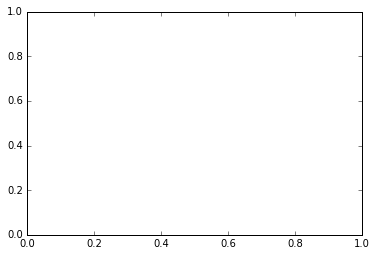

In [70]:
plt.scatter(bffc['opg'][:-1],bffg['g'])

In [71]:
# MAIN CORRELATION:
ssp.pearsonr(ssopg['opg'],bfffa['gfp'] )

(0.61581814333997642, 1.5602016895499559e-48)

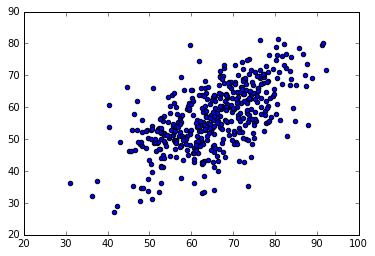

In [72]:
plt.scatter(ssopg['opg'],bfffa['gfp'] )

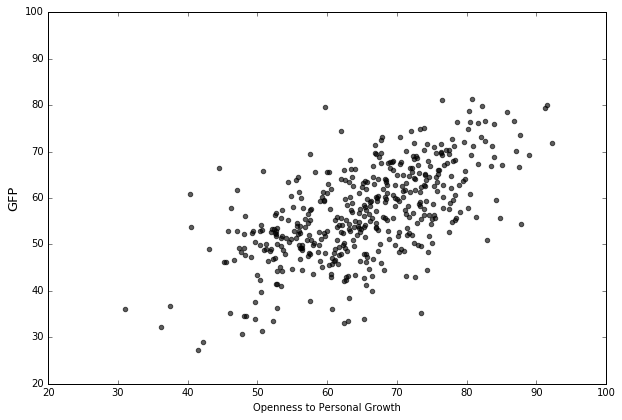

In [79]:
fig = plt.figure(figsize=[10,6.66])
plt.scatter(ssopg['opg'],bfffa['gfp'],alpha=.63,c='k')
plt.ylim([20,100])
plt.xlim([20,100])
plt.xlabel('Openness to Personal Growth')
plt.ylabel('GFP',fontsize=13)
plt.savefig("POSTER_OPG_GFP_Plot_BFF.png",dpi=400)

In [ ]:
bfffa['age']= df_questionnaire_complete['age'].astype(float)

In [ ]:
ssopg['age'] = df_questionnaire_complete['age'].astype(float)

In [ ]:
ssp.pearsonr(ssopg['opg']*ssopg['age'],bfffa['gfp'])

In [ ]:
clnbff = bfffa.copy(True)

In [ ]:
afirst_bff = clnbff[(clnbff['age']<=26) & (clnbff['age']>=(18))]
afirst_opg = ssopg[(ssopg['age']<=26) & (ssopg['age']>=(18))]

In [ ]:
print ssp.pearsonr(afirst_bff['gfp'],afirst_opg['opg'])
print len(afirst_bff)
print len(afirst_opg)

In [ ]:
asecond_bff = clnbff[(clnbff['age']<=35) & (clnbff['age']>=27)]
asecond_opg = ssopg[(ssopg['age']<=35) & (ssopg['age']>=27)]

In [ ]:
print ssp.pearsonr(asecond_bff['gfp'],asecond_opg['opg'])
print len(asecond_bff)
print len(asecond_opg)


In [ ]:
athird_bff = clnbff[(clnbff['age']<=42) & (clnbff['age']>=36)]
athird_opg = ssopg[(ssopg['age']<=42) & (ssopg['age']>=36)]

In [ ]:
print ssp.pearsonr(athird_bff['gfp'],athird_opg['opg'])
print len(athird_bff)
print len(athird_opg)

In [ ]:
afourth_bff = clnbff[clnbff['age']>=43]
afourth_opg = ssopg[ssopg['age']>=43]

In [ ]:
print ssp.pearsonr(afourth_bff['gfp'],afourth_opg['opg'])
print len(afourth_bff)
print len(afourth_opg)

In [ ]:
fdf_stable = bfffa[[x-1 for x in Neuro_ls]]
fdf_open = bfffa[[x-1 for x in Open_ls]]
fdf_extro = bfffa[[x-1 for x in Extra_ls]]
fdf_conci = bfffa[[x-1 for x in Conci_ls ]]
fdf_agree = bfffa[[x-1 for x in Agree_ls]]


# In[25]:

fdf_stable['stability'] = fdf_stable.mean(axis=1)
fdf_open['openness'] = fdf_open.mean(axis=1) 
fdf_extro['extro'] = fdf_extro.mean(axis=1)
fdf_conci['conci'] = fdf_conci.mean(axis=1)
fdf_agree['agree'] = fdf_agree.mean(axis=1)


# In[26]:

fmeasures = [fdf_stable['stability'],fdf_open['openness'],fdf_extro['extro'],fdf_conci['conci'],fdf_agree['agree']]


# In[27]:

for construct in fmeasures:
    print ssp.pearsonr(ssopg['opg'],construct)

In [ ]:
#Items that were reversed when loading on to common factors
#NEUROTICISM:
bff['BF-F65+'] = pd.Series(100-bff['BF-F65+'])
#AGREEABLENESS
bff['BF-F46-'] = pd.Series(100-bff['BF-F46-'])
#EXTRAVERSION
bff['BF-F44-'] = pd.Series(100-bff['BF-F44-'])
bff['BF-F48-'] = pd.Series(100-bff['BF-F48-'])
bff['BF-F49-'] = pd.Series(100-bff['BF-F49-'])
#CONCIENTIOUSNESS
bff['BF-F74+'] = pd.Series(100-bff['BF-F74+'])

In [ ]:
opg.head()

In [ ]:
opg.head()

In [ ]:
opg['opg']=opg.mean(axis=1,numeric_only=True)
bff['gfp'] = bff.mean(axis=1,numeric_only=True)

In [ ]:
# MAIN CORRELATION:
ssp.pearsonr(ssopg['opg'],bfffa['gfp'] )

In [ ]:
fig = plt.figure(figsize=[12,10])
plt.scatter(ssopg['opg'],bfffa['gfp'],alpha=.63,c='k')
plt.ylim([20,100])
plt.xlim([20,100])
plt.xlabel('OPG',fontsize=13)
plt.ylabel('GFP',fontsize=13)
plt.savefig("FinalOPG_FFB_Plot_S2.png",dpi=400)

In [ ]:
#PGQ?

In [ ]:
bff['age']= df['age'].astype(float)

In [ ]:
opg['age'] = df['age'].astype(float)

In [ ]:
plt.scatter(ssopg['opg'],bfffa['gfp'],c='K',,alpha=.5)

In [ ]:
ssp.pearsonr(nopg['opg']*nopg['age'],nbff['gfp'])

In [ ]:
plt.scatter(nopg['opg']*nopg['age'],nbff['gfp'])

In [ ]:
#age buckets


In [ ]:
clnbff = bff

In [ ]:
clnbff = clnbff.drop(['age_normalized_gfp'],axis=1)

In [ ]:
afirst_bff = clnbff[(clnbff['age']<=26) & (clnbff['age']>=(18))]
afirst_opg = opg[(opg['age']<=26) & (opg['age']>=(18))]

In [ ]:
print ssp.pearsonr(afirst_bff['gfp'],afirst_opg['opg'])
print len(first_bff)
print len(first_opg)


In [ ]:
asecond_bff = clnbff[(clnbff['age']<=35) & (clnbff['age']>=27)]
asecond_opg = opg[(opg['age']<=35) & (opg['age']>=27)]

In [ ]:
print ssp.pearsonr(asecond_bff['gfp'],asecond_opg['opg'])
print len(asecond_bff)
print len(asecond_opg)


In [ ]:
athird_bff = clnbff[(clnbff['age']<=42) & (clnbff['age']>=36)]
athird_opg = opg[(opg['age']<=42) & (opg['age']>=36)]

In [ ]:
print ssp.pearsonr(athird_bff['gfp'],athird_opg['opg'])
print len(athird_bff)
print len(athird_opg)


In [ ]:
afourth_bff = clnbff[clnbff['age']>=43]
afourth_opg = opg[opg['age']>=43]

In [ ]:
print ssp.pearsonr(afourth_bff['gfp'],afourth_opg['opg'])
print len(afourth_bff)
print len(afourth_opg)

In [ ]:
#byfactor

In [ ]:
fdf_stable = bfffa[[x-1 for x in neuro_ls]]
fdf_open = bfffa[[x-1 for x in Open_ls]]
fdf_extro = bfffa[[x-1 for x in Extra_ls]]
fdf_conci = bfffa[[x-1 for x in Conci_ls ]]
fdf_agree = bfffa[[x-1 for x in agree_ls]]


# In[25]:

fdf_stable['stability'] = fdf_stable.mean(axis=1)
fdf_open['openness'] = fdf_open.mean(axis=1) 
fdf_extro['extro'] = fdf_extro.mean(axis=1)
fdf_conci['conci'] = fdf_conci.mean(axis=1)
fdf_agree['agree'] = fdf_agree.mean(axis=1)


# In[26]:

fmeasures = [fdf_stable['stability'],fdf_open['openness'],fdf_extro['extro'],fdf_conci['conci'],fdf_agree['agree']]


# In[27]:

for construct in fmeasures:
    print ssp.pearsonr(ssopg['opg'],construct)